In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

data = pd.read_csv('./src/USA_cars_datasets.csv')

Попробуем найти аномалии в датасете. Использовать будем методами LocalOutlierFactor и IsolationForest из пакета sklearn. 

LocalOutlierFactor реализует алгоритм локального уровеня выброса, который основывается на концепции локальной плотности, где локальность задаётся k ближайшими соседями, расстояния до которых используются для оценки плотности. Путём сравнения локальной плотности объекта с локальной плотностью его соседей можно выделить области с аналогичной плотностью и точки, которые имеют существенно меньшую плотность, чем её соседи. Эти точки считаются выбросами.

Наиболее распространенные методы, используемые для обнаружения аномалий, основаны на построении профиля того, что является «нормальным»: аномалии сообщаются как те экземпляры в наборе данных, которые не соответствуют нормальному профилю. IsolationForest использует другой подход: вместо того, чтобы пытаться построить модель обычных экземпляров, он явно изолирует аномальные точки в наборе данных. Основным преимуществом этого подхода является возможность использования методов выборки до такой степени, которая недопустима для методов на основе профилей, создавая очень быстрый алгоритм с низким потреблением памяти.

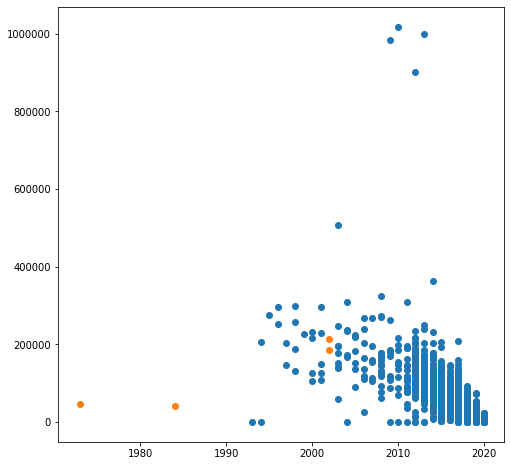

In [41]:
x = data.year.values.reshape(-1, 1)
y = data.mileage.values

clf = LocalOutlierFactor(n_neighbors=4)
predict = clf.fit_predict(x.reshape(-1, 1), y.reshape(-1, 1))

outline_indexes = np.where(predict == -1)
normal_indexes = np.where(predict == 1)

plt.figure(figsize=(8, 8))
plt.scatter(x[normal_indexes], y[normal_indexes])
plt.scatter(x[outline_indexes], y[outline_indexes])

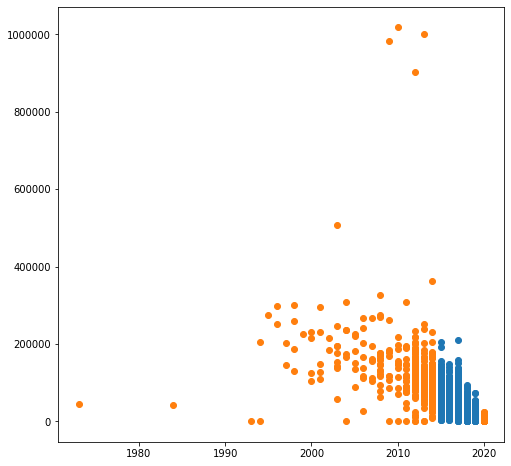

In [42]:
clf = IsolationForest(random_state=0)
predict = clf.fit_predict(x.reshape(-1, 1), y.reshape(-1, 1))

outline_indexes = np.where(predict == -1)
normal_indexes = np.where(predict == 1)

plt.figure(figsize=(8, 8))
plt.scatter(x[normal_indexes], y[normal_indexes])
plt.scatter(x[outline_indexes], y[outline_indexes])

Выше наблюдается следующая тенденция - изолирующий лес обнаружил слишком много аномалий, а LocalOutlierFactor недостаточно. Попробуем использовать другие данные.

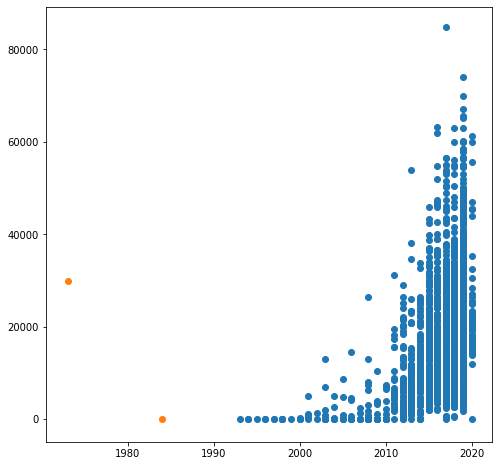

In [43]:
x = data.year.values.reshape(-1, 1)
y = data.price.values

clf = LocalOutlierFactor(n_neighbors=5)
predict = clf.fit_predict(x.reshape(-1, 1), y.reshape(-1, 1))

outline_indexes = np.where(predict == -1)
normal_indexes = np.where(predict == 1)

plt.figure(figsize=(8, 8))
plt.scatter(x[normal_indexes], y[normal_indexes])
plt.scatter(x[outline_indexes], y[outline_indexes])

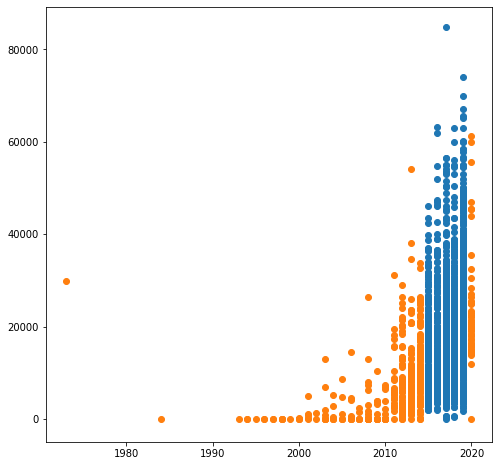

In [44]:
clf = IsolationForest(random_state=0)
predict = clf.fit_predict(x.reshape(-1, 1), y.reshape(-1, 1))

outline_indexes = np.where(predict == -1)
normal_indexes = np.where(predict == 1)

plt.figure(figsize=(8, 8))
plt.scatter(x[normal_indexes], y[normal_indexes])
plt.scatter(x[outline_indexes], y[outline_indexes])

Думаю, что нужна более хитрая зависимость данных, чтобы данные были более прогнозируемыми и аномалии более заметными.